## Quadratic Distribution using SVM - CH.SC.U4CSE23240

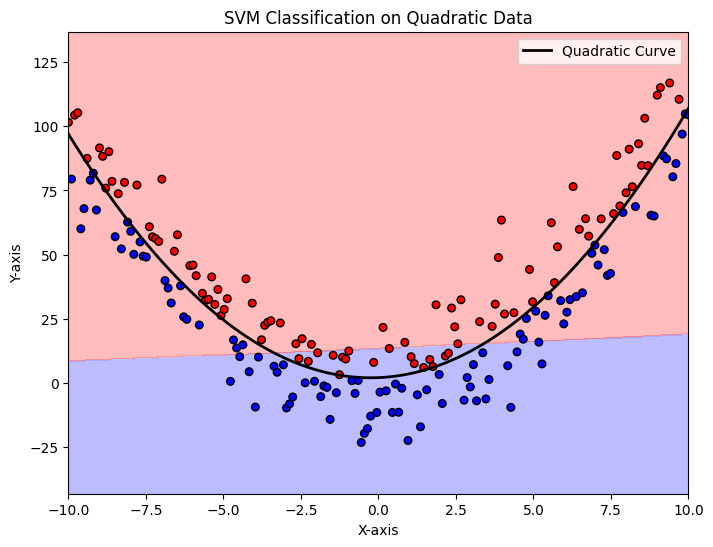

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

rng = np.random.default_rng(seed=42)

def quadratic_curve(x_vals, coeffs=(1, 0.5, 2)):
    a, b, c = coeffs
    return a * x_vals**2 + b * x_vals + c

x_vals = np.linspace(-10, 10, 200)
true_curve = quadratic_curve(x_vals)

noise = rng.normal(loc=0, scale=15, size=x_vals.shape)
observed_y = true_curve + noise
y_labels = (observed_y > true_curve).astype(int)
features = np.vstack((x_vals, observed_y)).T
X_train, X_test, y_train, y_test = train_test_split(features, y_labels, test_size=0.3, random_state=42)

svm_clf = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_clf.fit(X_train, y_train)

grid_x, grid_y = np.meshgrid(
    np.linspace(-10, 10, 500),
    np.linspace(observed_y.min() - 20, observed_y.max() + 20, 500)
)
grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]
predictions = svm_clf.predict(grid_points).reshape(grid_x.shape)

plt.figure(figsize=(8, 6))
plt.contourf(grid_x, grid_y, predictions, cmap="bwr", alpha=0.3)
plt.plot(x_vals, true_curve, "k-", lw=2, label="Quadratic Curve")

plt.scatter(features[:, 0], features[:, 1], c=y_labels, cmap="bwr", edgecolors="k", s=30)

plt.title("SVM Classification on Quadratic Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

